In [56]:
import pandas as pd

In [57]:
data = pd.read_csv("Bank Of Trust Dataset.csv")

In [58]:
data.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,saving,M,63,305,7695.00,NaN,479.00,NaN,622.0,...,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,NaN,0.00,435
1,20329,current,M,33,326,52702.00,988.72,29873.00,NaN,1087.0,...,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,NaN,4963.33,1921
2,17679,current,M,44,264,10800.49,3215.52,21659.64,1607.0,1168.0,...,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,NaN,0.00,1970
3,16428,saving,M,44,233,20936.00,NaN,2094.00,NaN,11778.5,...,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,NaN,1238.18,21579
4,18721,saving,F,35,324,1183.83,NaN,3656.29,NaN,945.0,...,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,NaN,0.00,1814


In [59]:
columns_with_na = data.columns[data.isna().any()].to_list()

In [60]:
print("Columns with NA values", columns_with_na)

Columns with NA values ['dc_cons_apr', 'dc_cons_may', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'credit_count_may', 'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun', 'loan_enq']


In [61]:
print("Len of Null values",len(columns_with_na))

Len of Null values 34


In [62]:
# List of numeric columns where we have to replace NaN values with 0
# Note: ideally we have to check with a domain expert whether filling a specific e,pty cells with 0 is appropriate
numeric_columns = [
    'dc_cons_apr', 'dc_cons_may', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
    'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active', 'vehicle_loan_active',
    'personal_loan_closed', 'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3', 'investment_4',
    'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
    'debit_amount_may', 'credit_amount_may', 'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
    'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun'
]

In [63]:
data[numeric_columns] = data[numeric_columns].fillna(0)

In [64]:
print(data[numeric_columns].isna().sum())

dc_cons_apr              0
dc_cons_may              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     0
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
dtype: int64


In [65]:
data.columns[data.isna().any()].to_list()

['loan_enq']

In [66]:
data["loan_enq"] = data["loan_enq"].fillna("N")

In [67]:
data.columns[data.isna().any()].to_list()

[]

In [68]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [69]:
X = data.drop(columns="cc_cons",axis=1)

In [70]:
y= data["cc_cons"]

In [71]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = ['account_type', 'gender', 'loan_enq']

In [72]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [73]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (26256, 43)
Shape of X_test: (6564, 43)
Shape of y_train: (26256,)
Shape of y_test: (6564,)


In [75]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
X_train[:2]  # Display the first two rows of the transformed training data

array([[-8.92149382e-01,  1.26184550e-01,  1.01228936e+00,
         8.04465192e-01, -2.93998513e-01, -2.65915823e-01,
        -2.54330193e-01,  7.49194007e-01, -2.68134403e-01,
         1.39285355e+00, -2.62852474e-02,  1.07436327e-01,
        -4.65370796e-01, -4.99181464e-01, -5.39590028e-01,
         6.77124663e-02, -2.98267570e-01, -1.63548175e-01,
        -3.11254411e-01, -2.28328362e-01, -3.77327103e-02,
        -9.60279314e-02, -8.31306433e-02, -6.98201952e-02,
        -1.27928131e-01, -2.97086648e-02, -4.32490136e-01,
         1.16903984e-01,  3.24543384e-04,  1.51334736e-01,
         1.16134971e-02, -4.72475333e-01, -5.19753825e-01,
         5.51234031e-02, -8.50955727e-02, -8.12618590e-02,
        -7.33318169e-01, -6.84578159e-01,  4.85145277e-02,
        -2.63081650e-02,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [-1.30408735e+00,  2.25299724e+00, -1.08356872e-01,
        -3.63408806e-01,  2.10

In [76]:
import torch

In [77]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

In [78]:
#!pip3 uninstall -y torch torchvision
#!pip3 install torch torchvision

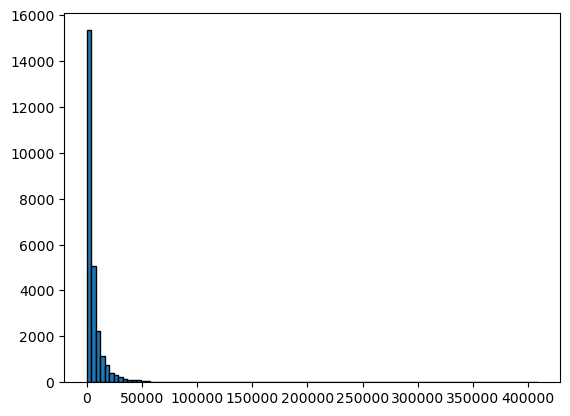

In [79]:
import matplotlib.pyplot as plt
plt.hist(y_train_tensor, bins=100,edgecolor='black')
plt.show()


In [80]:
def rmsle(y_true, y_pred):
    y_true = torch.clamp(y_true,min=0)+1
    y_pred = torch.clamp(y_pred,min=0)+1
    log_pred = torch.log(y_pred)
    log_true = torch.log(y_true)
    squared_log_error = (log_pred - log_true) ** 2
    mean_squared_log_error = torch.mean(squared_log_error)
    rmsle = torch.sqrt(mean_squared_log_error)
    return rmsle

In [81]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

In [82]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_test_tensor.shape[1], 128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,32)
        self.fc4 = nn.Linear(32,1)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


In [83]:
train_data = TensorDataset(X_train_tensor, y_train_tensor)

In [84]:
Model = Net()
optimizer = optim.SGD(Model.parameters(),lr=0.001,momentum=0.9)
train_loss_list = []
test_loss_list = []
num_epochs = 100
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

In [85]:
for epoch in range(num_epochs):
    for X_batch, y_batch in train_loader:
        #forward pass
        pred = Model(X_batch)
        loss = rmsle(pred, y_batch)
        #backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss = rmsle(Model(X_train_tensor), y_train_tensor).item()
    test_loss = rmsle(Model(X_test_tensor),y_test_tensor).item()
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

Epoch 1/100, Train Loss: 8.1214, Test Loss: 8.1465
Epoch 2/100, Train Loss: 8.1214, Test Loss: 8.1465
Epoch 3/100, Train Loss: 8.1214, Test Loss: 8.1465
Epoch 4/100, Train Loss: 8.1214, Test Loss: 8.1465
Epoch 5/100, Train Loss: 8.1214, Test Loss: 8.1465
Epoch 6/100, Train Loss: 8.1214, Test Loss: 8.1465
Epoch 7/100, Train Loss: 8.1214, Test Loss: 8.1465
Epoch 8/100, Train Loss: 8.1214, Test Loss: 8.1465
Epoch 9/100, Train Loss: 8.1214, Test Loss: 8.1465
Epoch 10/100, Train Loss: 8.1214, Test Loss: 8.1465
Epoch 11/100, Train Loss: 8.1214, Test Loss: 8.1465
Epoch 12/100, Train Loss: 8.1214, Test Loss: 8.1465
Epoch 13/100, Train Loss: 8.1214, Test Loss: 8.1465
Epoch 14/100, Train Loss: 8.1214, Test Loss: 8.1465
Epoch 15/100, Train Loss: 8.1214, Test Loss: 8.1465
Epoch 16/100, Train Loss: 8.1214, Test Loss: 8.1465
Epoch 17/100, Train Loss: 8.1214, Test Loss: 8.1465
Epoch 18/100, Train Loss: 8.1214, Test Loss: 8.1465
Epoch 19/100, Train Loss: 8.1214, Test Loss: 8.1465
Epoch 20/100, Train L

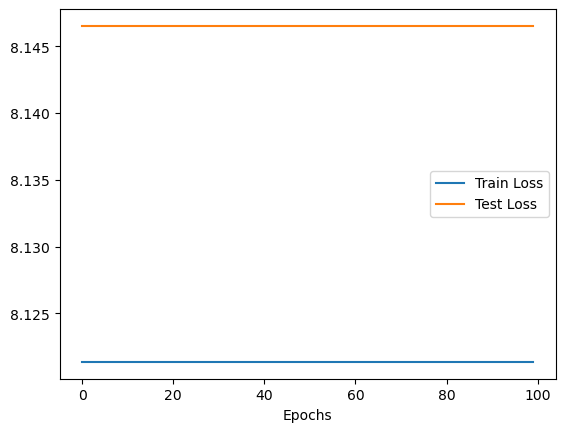

In [86]:
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.xlabel('Epochs')
plt.legend()

In [87]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(X_test_tensor.shape[1],512)
        self.fc2 = nn.Linear(512,128)
        self.fc3 = nn.Linear(128,32)
        self.fc4 = nn.Linear(32,1)
    def forward(self,x):
            x = F.relu(self,fc1(x))
            x = F.relu(self.fc2(x))
            x = F.relu(self.fc3(x))
            x = self.fc4(x)
            return x
        


In [89]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Define the three linear layers
        self.fc1 = nn.Linear(X_test_tensor.shape[1], 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128,32)
        self.fc4 = nn.Linear(32,1)
        
    def forward(self, x):
        # Pass x through linear layers adding activations
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [93]:
model = Net()
optimizer = optim.Adam(model.parameters())
train_loss_list=[]
test_loss_list = []
num_epochs = 100
train_loader = DataLoader(train_data, batch_size= 128, shuffle=True) 
# Execute the training loop
for epoch in range(num_epochs): # increasing the epochs for effective training
    for X_batch, y_batch in train_loader:
        # Forward pass
        pred = model(X_batch)
        loss = rmsle(pred, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss = rmsle(model(X_train_tensor), y_train_tensor).item()
        # print(epoch,': ', train_loss)
    test_loss = rmsle(model(X_test_tensor), y_test_tensor).item()
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    if (epoch+1) % 5 == 0: # printing after every 100 epochs
        print(f'Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
    

Epoch 5: Train Loss: 1.3204, Test Loss: 1.3083
Epoch 10: Train Loss: 1.3155, Test Loss: 1.3025
Epoch 15: Train Loss: 1.3145, Test Loss: 1.3013
Epoch 20: Train Loss: 1.3142, Test Loss: 1.2984
Epoch 25: Train Loss: 1.3144, Test Loss: 1.3006
Epoch 30: Train Loss: 1.3142, Test Loss: 1.2987
Epoch 35: Train Loss: 1.3147, Test Loss: 1.2988
Epoch 40: Train Loss: 1.3141, Test Loss: 1.2978
Epoch 45: Train Loss: 1.3141, Test Loss: 1.3005
Epoch 50: Train Loss: 1.3144, Test Loss: 1.2995
Epoch 55: Train Loss: 1.3144, Test Loss: 1.2983
Epoch 60: Train Loss: 1.3144, Test Loss: 1.2976
Epoch 65: Train Loss: 1.3141, Test Loss: 1.2990
Epoch 70: Train Loss: 1.3140, Test Loss: 1.2984
Epoch 75: Train Loss: 1.3141, Test Loss: 1.3009
Epoch 80: Train Loss: 1.3141, Test Loss: 1.2984
Epoch 85: Train Loss: 1.3142, Test Loss: 1.2995
Epoch 90: Train Loss: 1.3144, Test Loss: 1.2998
Epoch 95: Train Loss: 1.3145, Test Loss: 1.2981
Epoch 100: Train Loss: 1.3145, Test Loss: 1.2989


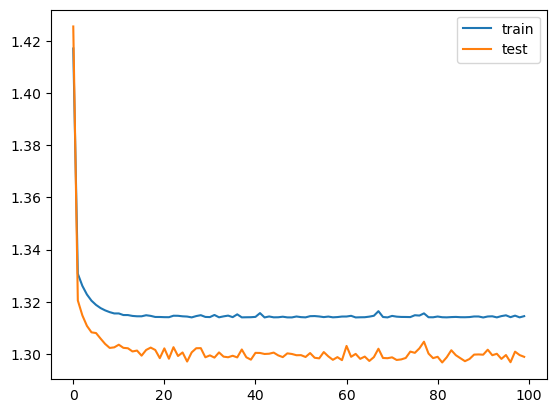

In [94]:
plt.plot(range(num_epochs),train_loss_list, label = 'train')
plt.plot(range(num_epochs),test_loss_list, label = 'test')
plt.legend()
plt.show()